In [1]:
# C:\Users\Yogita\Downloads\archive (2)
import random
random.seed(0)

# Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow
tensorflow.__version__

'2.15.0'

In [2]:
import os
import cv2

data_path = 'path_to_image_dataset'

In [3]:
os.listdir(data_path)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [4]:
df = pd.DataFrame(columns=['file_name','class','image'])
type(df)


pandas.core.frame.DataFrame

In [5]:
for i in os.listdir(data_path):
    for j in os.listdir(os.path.join(data_path, i)):
        img = cv2.imread(os.path.join(data_path, i, j))
        df = df._append({'file_name': j, 'class': i, 'image': img}, ignore_index=True)

In [6]:
df['class'].unique()

array(['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'], dtype=object)

In [7]:
df = df.sample(frac=0.3, random_state=42)
df.reset_index(drop=True, inplace=True)

# Displaying the first few rows of the sampled DataFrame
df.head()

,file_name,class,image
0,21055041762_5d0a066948_n.jpg,tulip,"[[[153, 150, 196], [126, 152, 188], [103, 148,..."
1,18464052396_6327841e65_n.jpg,rose,"[[[0, 0, 0], [0, 0, 0], [1, 1, 1], [1, 1, 1], ..."
2,15699509054_d3e125286f_n.jpg,rose,"[[[10, 35, 15], [11, 38, 18], [15, 46, 25], [2..."
3,8241471746_5d81fdd3c0_n.jpg,rose,"[[[56, 56, 62], [127, 131, 150], [195, 189, 20..."
4,19868509504_b2fc173274_n.jpg,tulip,"[[[117, 193, 212], [116, 195, 214], [114, 197,..."


In [8]:
for i in range(10):
    img_size = df['image'][i].shape
    print(img_size)

(134, 240, 3)
(134, 240, 3)
(213, 320, 3)
(240, 320, 3)
(134, 240, 3)
(240, 320, 3)
(240, 240, 3)
(240, 320, 3)
(159, 240, 3)
(315, 500, 3)


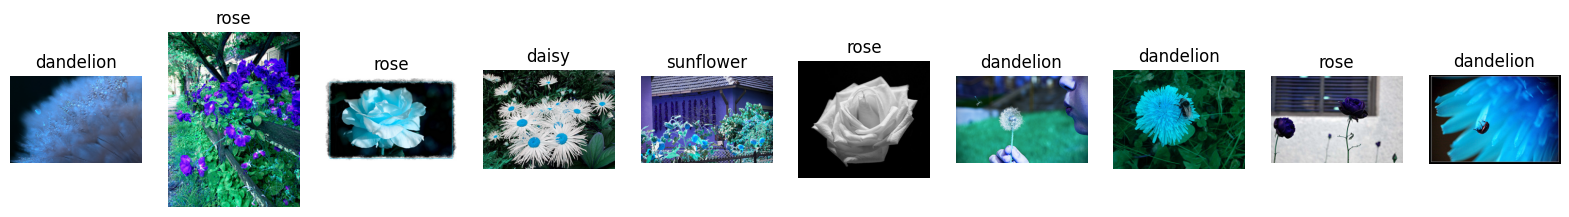

In [9]:
# visualizing the random images in the dataset along with their labels
def sample_img(df,n):
    df = df.sample(n)
    plt.figure(figsize=(20,20))
    for i,j in enumerate(df.iterrows()):
        plt.subplot(1,n,i+1)
        plt.imshow(j[1]['image'])
        plt.title("{}".format(j[1]['class']))
        plt.axis('off')
sample_img(df,10)

In [10]:
# Segregating X and Y

X = df['image']
y = df['class']

In [11]:
# Splitting the dataset into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3, random_state=42)

print("Training:",X_train.shape, Y_train.shape)
print('Testing:',X_test.shape,Y_test.shape)

Training: (906,) (906,)
Testing: (389,) (389,)


In [12]:
# Reshaping X_train and X_test suitable for the model

import cv2
x_train = []
for i, j in enumerate(X_train):
    img = cv2.resize(j, (128, 128))
    x_train.append(img)

x_test = []
for i, j in enumerate(X_test):
    img = cv2.resize(j, (128, 128))
    x_test.append(img)

# Converting to Numpy array
x_train = np.array(x_train)
x_test = np.array(x_test)

# checking the shape after reshaping
print('Train data:', x_train.shape)
print('Test data:', x_test.shape)

Train data: (906, 128, 128, 3)
Test data: (389, 128, 128, 3)


In [13]:
# Normalizing the X_train and X_test

x_train = (x_train/255).astype('float32')
x_test = (x_test/255).astype('float32')

In [14]:
# Lets check the max and min values

print("Max and Min value in X_train:", x_train.max(), x_train.min())
print("Max and Min value in X_test:", x_test.max(), x_test.min())

Max and Min value in X_train: 1.0 0.0
Max and Min value in X_test: 1.0 0.0


In [16]:
# Converting the target feature to one-hot vectors for the training set

y_train_onehot = pd.get_dummies(Y_train)
y_test_onehot = pd.get_dummies(Y_test)


print("Shape of y_train:", y_train_onehot.shape)
print(y_train_onehot)

Shape of y_train: (906, 5)
      daisy  dandelion   rose  sunflower  tulip
1057   True      False  False      False  False
666   False      False   True      False  False
551   False       True  False      False  False
413    True      False  False      False  False
594   False       True  False      False  False
...     ...        ...    ...        ...    ...
1044  False       True  False      False  False
1095  False      False   True      False  False
1130  False       True  False      False  False
860   False      False  False      False   True
1126  False       True  False      False  False

[906 rows x 5 columns]


In [17]:
# Initializing basic CNN model

from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.models import Sequential


model = Sequential()
model.add(Conv2D(filters=224, kernel_size=3, activation="relu", input_shape=(128, 128, 3)))
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(5, activation="softmax"))


# Compiling the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 224)     6272      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 128)     258176    
                                                                 
 conv2d_2 (Conv2D)           (None, 122, 122, 64)      73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 120, 120, 32)      18464     
                                                                 
 flatten (Flatten)           (None, 460800)            0         
                                                                 
 dense (Dense)               (None, 32)                14745632  
                                                                 
 dense_1 (Dense)             (None, 64)               

In [18]:
basic_cnn_history = model.fit(x=x_train, y=y_train_onehot,
                             batch_size=32,
                             epochs=50,
                             validation_data=(x_test, y_test_onehot))

Epoch 1/50


29/29 [==============================] - 256s 9s/step - loss: 1.6247 - accuracy: 0.2406 - val_loss: 1.5944 - val_accuracy: 0.2648
Epoch 2/50
29/29 [==============================] - 297s 10s/step - loss: 1.4668 - accuracy: 0.3631 - val_loss: 1.4238 - val_accuracy: 0.3368
Epoch 3/50
29/29 [==============================] - 345s 12s/step - loss: 1.2929 - accuracy: 0.4812 - val_loss: 1.3139 - val_accuracy: 0.4781
Epoch 4/50
29/29 [==============================] - 301s 10s/step - loss: 1.0155 - accuracy: 0.6369 - val_loss: 1.6320 - val_accuracy: 0.4602
Epoch 5/50
29/29 [==============================] - 299s 10s/step - loss: 0.6882 - accuracy: 0.7638 - val_loss: 2.3342 - val_accuracy: 0.4422
Epoch 6/50
29/29 [==============================] - 259s 9s/step - loss: 0.4512 - accuracy: 0.8664 - val_loss: 3.5748 - val_accuracy: 0.3805
Epoch 7/50
29/29 [==============================] - 165s 6s/step - loss: 0.2361 - accuracy: 0.9249 - val_loss: 3.4116 - val_accuracy: 0.3959
Epoch 8

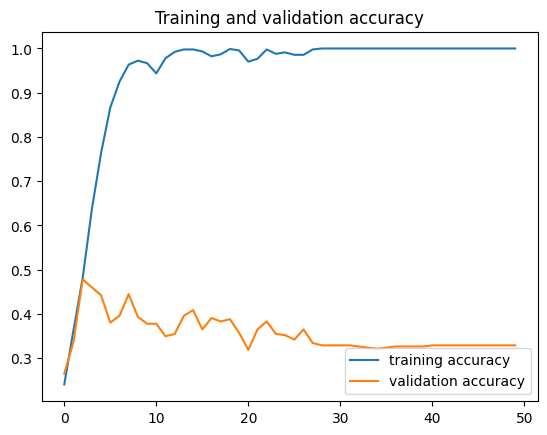

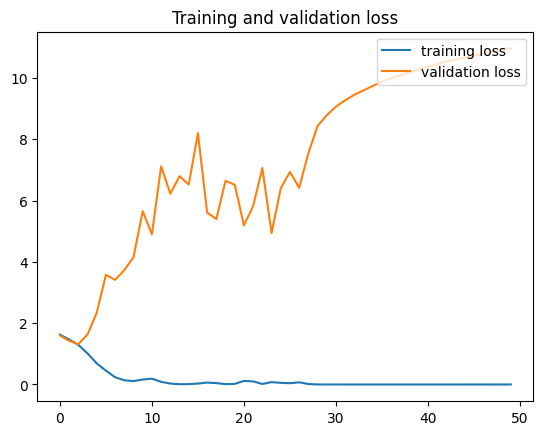

In [19]:
# Accuracy and Loss plots

accuracy = basic_cnn_history.history['accuracy']
val_accuracy = basic_cnn_history.history['val_accuracy']
loss = basic_cnn_history.history['loss']
val_loss = basic_cnn_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')
plt.show()

The model is very much overfitted and accuracy is very less.

In [20]:
# Saving model and its weights for future use
model.save('basic_cnn.h5')
model.save_weights('basiccnn_weights1.h5')

VGG16

In [21]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model

base_model = VGG16(input_shape=(128,128,3),
                   weights='imagenet',
                   include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x) 
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x) 
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
preds = Dense(5, activation='softmax')(x) 

model_vgg16 = Model(inputs=base_model.input, outputs=preds)

for layer in model_vgg16.layers[:20]:
    layer.trainable=False
for layer in model_vgg16.layers[20:]:
    layer.trainable=True

model_vgg16.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_vgg16.summary()


58889256/58889256 [==============================] - 19s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                            

In [23]:
vgg16_history = model_vgg16.fit(x=x_train, y=y_train_onehot, 
                                batch_size=64, 
                                epochs=50, 
                               validation_data=(x_test, y_test_onehot))

Epoch 1/50
15/15 [==============================] - 69s 5s/step - loss: 1.1792 - accuracy: 0.5331 - val_loss: 1.0460 - val_accuracy: 0.7018
Epoch 2/50
15/15 [==============================] - 131s 9s/step - loss: 1.1022 - accuracy: 0.5828 - val_loss: 1.0190 - val_accuracy: 0.6864
Epoch 3/50
15/15 [==============================] - 93s 6s/step - loss: 1.0692 - accuracy: 0.5828 - val_loss: 0.9808 - val_accuracy: 0.6941
Epoch 4/50
15/15 [==============================] - 120s 8s/step - loss: 1.0192 - accuracy: 0.5949 - val_loss: 0.9500 - val_accuracy: 0.6915
Epoch 5/50
15/15 [==============================] - 106s 7s/step - loss: 0.9904 - accuracy: 0.6082 - val_loss: 0.9216 - val_accuracy: 0.7147
Epoch 6/50
15/15 [==============================] - 100s 7s/step - loss: 0.9475 - accuracy: 0.6313 - val_loss: 0.8906 - val_accuracy: 0.6992
Epoch 7/50
15/15 [==============================] - 107s 7s/step - loss: 0.8957 - accuracy: 0.6457 - val_loss: 0.8669 - val_accuracy: 0.6967
Epoch 8/50
15/1

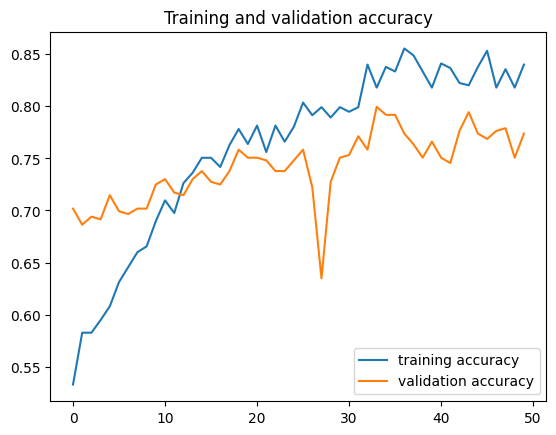

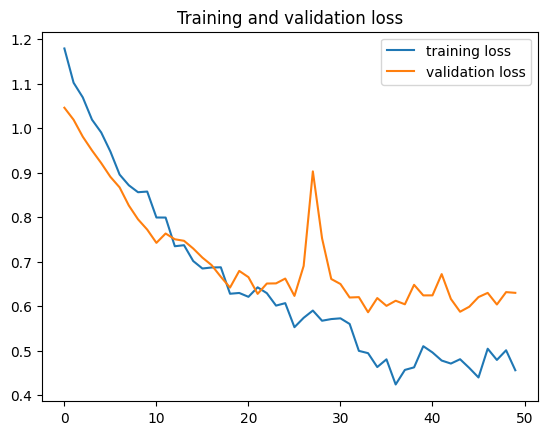

In [24]:
# Accuracy and Loss plots

accuracy = vgg16_history.history['accuracy']
val_accuracy = vgg16_history.history['val_accuracy']
loss = vgg16_history.history['loss']
val_loss = vgg16_history.history['val_loss']

epochs   = range(len(accuracy)) 

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')
plt.show()

In [25]:
# Saving model and its weights for future use
model_vgg16.save('vgg16_cnn.h5')
model_vgg16.save_weights('vgg16_weights1.h5')

In [28]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = VGG19(input_shape=x_train[0].shape,
                   weights='imagenet',
                   include_top=False) 

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x) #dense layer 2
x = Dense(256, activation='relu')(x) #dense layer 3
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
preds = Dense(5, activation='softmax')(x) #final layer with softmax activation

model_vgg19 = Model(inputs=base_model.input,
                    outputs=preds)

for layer in model_vgg19.layers[:20]:
    layer.trainable=False
for layer in model_vgg19.layers[20:]:
    layer.trainable=True

model_vgg19.compile(optimizer='Adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_vgg19.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [29]:
vgg19_history = model_vgg19.fit(x=x_train, y=y_train_onehot, 
                              batch_size=64, 
                              epochs=50, 
                              validation_data=(x_test, y_test_onehot))

Epoch 1/50
15/15 [==============================] - 116s 8s/step - loss: 1.7201 - accuracy: 0.3444 - val_loss: 1.4336 - val_accuracy: 0.4730
Epoch 2/50
15/15 [==============================] - 120s 8s/step - loss: 1.2315 - accuracy: 0.5408 - val_loss: 0.9529 - val_accuracy: 0.6221
Epoch 3/50
15/15 [==============================] - 130s 9s/step - loss: 0.9784 - accuracy: 0.6435 - val_loss: 1.0406 - val_accuracy: 0.5913
Epoch 4/50
15/15 [==============================] - 156s 11s/step - loss: 0.8963 - accuracy: 0.6667 - val_loss: 1.2894 - val_accuracy: 0.5424
Epoch 5/50
15/15 [==============================] - 126s 8s/step - loss: 0.7773 - accuracy: 0.7031 - val_loss: 0.8517 - val_accuracy: 0.6812
Epoch 6/50
15/15 [==============================] - 130s 9s/step - loss: 0.6215 - accuracy: 0.7616 - val_loss: 0.7479 - val_accuracy: 0.7172
Epoch 7/50
15/15 [==============================] - 144s 10s/step - loss: 0.6520 - accuracy: 0.7439 - val_loss: 0.7097 - val_accuracy: 0.7763
Epoch 8/50


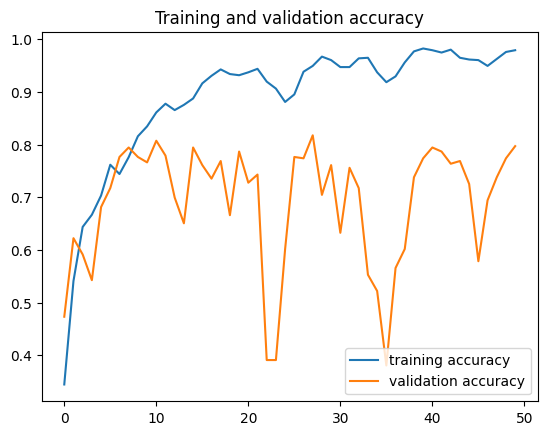

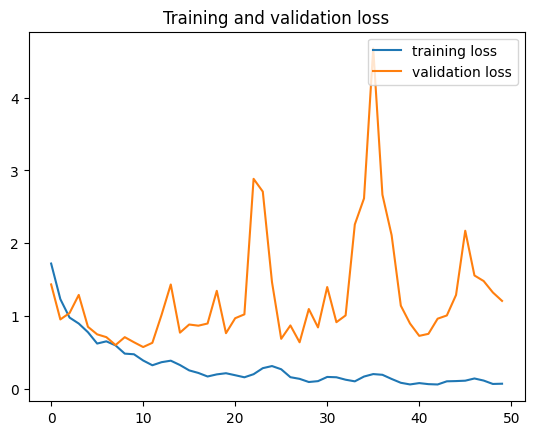

In [30]:
# Accuracy and Loss plots

accuracy = vgg19_history.history['accuracy']
val_accuracy = vgg19_history.history['val_accuracy']
loss = vgg19_history.history['loss']
val_loss = vgg19_history.history['val_loss']

epochs   = range(len(accuracy)) 

plt.plot(epochs, accuracy, label = 'training accuracy')
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training loss')
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')
plt.show()

In [31]:
import tensorflow
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = ResNet50(input_shape=(128, 128 ,3),
                      weights='imagenet',
                      include_top=False) 

x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x) 
x = Dense(128, activation='relu')(x) 
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
preds = Dense(5, activation='softmax')(x) 

model_resnet50 = Model(inputs=base_model.input, outputs=preds)

for layer in model_resnet50.layers[:150]:
    layer.trainable=False
for layer in model_resnet50.layers[150:]:
    layer.trainable=True

model_resnet50.compile(optimizer=tensorflow.optimizers.Adam(learning_rate=1e-5),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

model_resnet50.summary()

94765736/94765736 [==============================] - 37s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1_conv[0][0]']          
 on)                      

In [32]:
resent50_history = model_resnet50.fit(x=x_train, y=y_train_onehot, 
                                     batch_size=64, 
                                     epochs=50, 
                                     validation_data=(x_test, y_test_onehot))

Epoch 1/50
15/15 [==============================] - 43s 2s/step - loss: 2.3324 - accuracy: 0.2141 - val_loss: 1.7015 - val_accuracy: 0.1928
Epoch 2/50
15/15 [==============================] - 31s 2s/step - loss: 1.7542 - accuracy: 0.3554 - val_loss: 1.6982 - val_accuracy: 0.1928
Epoch 3/50
15/15 [==============================] - 30s 2s/step - loss: 1.4613 - accuracy: 0.4426 - val_loss: 1.6957 - val_accuracy: 0.1928
Epoch 4/50
15/15 [==============================] - 32s 2s/step - loss: 1.2778 - accuracy: 0.5088 - val_loss: 1.6879 - val_accuracy: 0.1851
Epoch 5/50
15/15 [==============================] - 30s 2s/step - loss: 1.1589 - accuracy: 0.5530 - val_loss: 1.6735 - val_accuracy: 0.1774
Epoch 6/50
15/15 [==============================] - 32s 2s/step - loss: 0.9767 - accuracy: 0.6159 - val_loss: 1.6777 - val_accuracy: 0.1645
Epoch 7/50
15/15 [==============================] - 39s 3s/step - loss: 0.9018 - accuracy: 0.6611 - val_loss: 1.6875 - val_accuracy: 0.1954
Epoch 8/50
15/15 [==

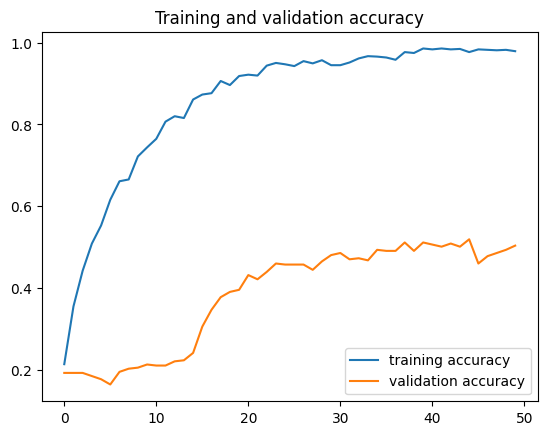

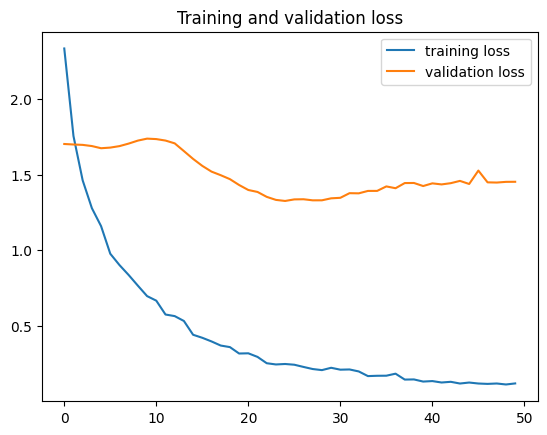

In [33]:
# Accuracy and Loss plots

accuracy = resent50_history.history['accuracy']
val_accuracy = resent50_history.history['val_accuracy']
loss = resent50_history.history['loss']
val_loss = resent50_history.history['val_loss']

epochs   = range(len(accuracy))

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')
plt.show()

In [34]:
# Saving model and its weights for future use
model_resnet50.save('resnet50.h5')
model_resnet50.save_weights('resnet50_weights.h5')

From the results, VGG16 and VGG19 performed better and gave approx 80% accuracy. 

In [37]:
from tensorflow.keras.models import load_model

# Loading VGG16
model_vgg16 = load_model('vgg16_cnn.h5')

------------------------------------------------------------
VGG16
1/1 [==============================] - 0s 126ms/step
Softmax Outputs: [[2.4831947e-03 1.3017820e-04 9.6057004e-01 1.0790038e-03 3.5737574e-02]]


Predicted_Label_vgg16: rose


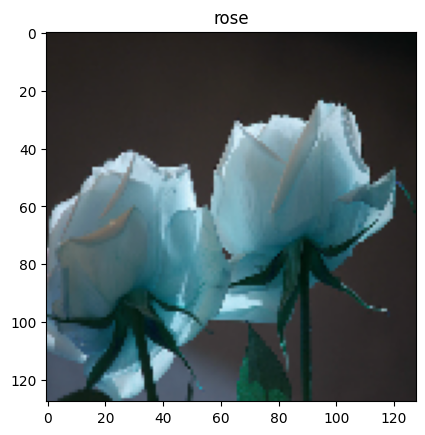

In [54]:
# Predicting and vizualizing the test image using pretrained Model VGG16

import matplotlib.pyplot as plt
%matplotlib inline

n = 54
plt.title(list(Y_test)[n])
plt.imshow(list(x_test)[n])

labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


# VGG16
print('-'*60)
print('VGG16')
y_pred_vgg16 = model_vgg16.predict(x_test[n].reshape(1, 128, 128, 3))
print("Softmax Outputs:", y_pred_vgg16)

for i in y_pred_vgg16:
    for j, k in enumerate(i):
        if k == y_pred_vgg16.max():
            print('\n')
            print('Predicted_Label_vgg16:',labels[j])

VGG19
1/1 [==============================] - 0s 120ms/step
Softmax Outputs: [[1.16320514e-07 2.68806580e-05 3.59646394e-04 3.79121980e-06
  9.99609649e-01]]


Predicted_Label_vgg16: tulip


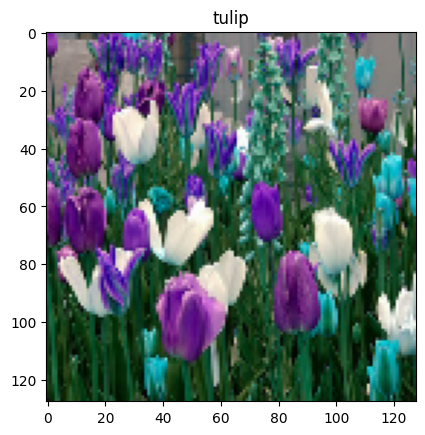

In [57]:
# Predicting and vizualizing the test image using pretrained Model vgg19

import matplotlib.pyplot as plt
%matplotlib inline

n = 59
plt.title(list(Y_test)[n])
plt.imshow(list(x_test)[n])

labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


# VGG19
print('VGG19')
y_pred_vgg16 = model_vgg19.predict(x_test[n].reshape(1, 128, 128, 3))
print("Softmax Outputs:", y_pred_vgg16)

for i in y_pred_vgg16:
    for j, k in enumerate(i):
        if k == y_pred_vgg16.max():
            print('\n')
            print('Predicted_Label_vgg16:',labels[j])